Week 3:

Program 2: Benchmark the performance of CPU versus GPU for training a deep learning model on the Fashion
MNIST dataset. Specifically, compare the training times and performance metrics for models with:
1. One hidden layer.
2. Five hidden layers.

Ashwin Saji(240984006)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
tf.test.is_built_with_cuda()

True

<h4 style="color:purple">Load the Dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

<h4 style="color:purple">Data Visualization</h4>

In [ ]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

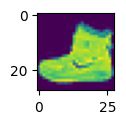

In [ ]:
plot_sample(0)

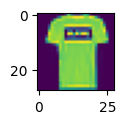

In [ ]:
plot_sample(1)

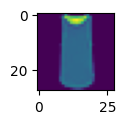

In [ ]:
plot_sample(2)

In [ ]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

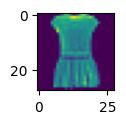

In [ ]:
plot_sample(3)

In [ ]:
classes[y_train[3]]

'Dress'

In [ ]:
y_train[:3]

array([9, 0, 0], dtype=uint8)

In [ ]:
y_test.shape

(10000,)

In [ ]:
X_train.shape

(60000, 28, 28)

<h4 style="color:purple">Preprocessing: Scale images</h4>

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
# y_train_categorical = keras.utils.to_categorical(
#     y_train, num_classes=10, dtype='float32'
# )
# y_test_categorical = keras.utils.to_categorical(
#     y_test, num_classes=10, dtype='float32'
# )

In [ ]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
# y_train_categorical[0:5]

<h4 style="color:purple">Model building and training</h4>

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.7323 - loss: 0.8600


<h4 style="color:purple">Predictions</h4>

In [ ]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


9

In [ ]:
y_test[0]

9

In [ ]:
def get_1_hidden_layer_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

    model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
def get_5_hidden_layers_model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

    model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

<h3 style='color:purple'>Measure training time on a CPU<h3>

1 hidden layer model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_1_hidden_layer_model()
    cpu_model.fit(X_train_scaled, y_train, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.7266 - loss: 0.8951
41.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


5 hidden layers model

In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_5_hidden_layers_model()
    cpu_model.fit(X_train_scaled, y_train, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6925 - loss: 0.9556
1min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h3 style='color:purple'>Measure training time on a GPU<h3>

1 hidden layer

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_1_hidden_layer_model()
    cpu_model.fit(X_train_scaled, y_train, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7217 - loss: 0.9135
12.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


5 hidden layers

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_5_hidden_layers_model()
    cpu_model.fit(X_train_scaled, y_train, epochs=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6741 - loss: 0.9726
7.52 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Performance comparison between CPU and GPU,

| Hidden layers | CPU | GPU  |
|:------|:------|:------|
| 1 | 41.9 sec | 12.6 sec |
| 5 | 83 sec | 7.52 sec |

Remarks: GPU is significantly faster than the CPU providing nearly 3-4 times faster speeds for single hidden layer and 11-12 tines faster speeds for 5 hidden layers

Effect of increasing hidden layers on CPU and GPU: Increasing hidden layers increased training time significantly on the CPU whereas decreased training time on the GPU.

When to use GPU: The GPU can be used when the dataset is large or when a large number of neurons and hidden layers are involved or when training for a large number of epochs.